In [62]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from sklearn.decomposition import PCA

import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_colwidth',None)
%matplotlib inline

In [3]:
# Save the merged dataframe to a CSV file
df = pd.read_csv('/content/gdrive/Shareddrives/LMN/LMN_Group_Project/Datasets/Energy Consumption and Renewables Generation/merged_df.csv')

In [4]:
df.head()

,tmax,tmin,prcp,Total Energy Sales (MWh),Residential Sales (MWh),Commercial Sales (MWh),Industrial Sales (MWh),Peak Demand (MW),Total Customers,Gasoline Price,...,pce,reer,ir,ffer,tcs,indpro,ccpi,WTI Price,Brent Price,DATE
0,12.0,-6.0,0.01,2.233527e+09,722174766.0,674696022.0,775608276.0,506157.0,87386416.0,1.114,...,4632.6,104.66,5.973158,3.245000,513196.0,67.1060,154.8,14.78,13.80,1994-02-01
1,32.0,5.0,0.00,2.233527e+09,722174766.0,674696022.0,775608276.0,506157.0,87386416.0,1.109,...,4646.0,104.78,6.482609,3.335806,521040.0,67.7792,155.3,14.68,13.82,1994-03-01
2,69.0,28.0,0.00,2.233527e+09,722174766.0,674696022.0,775608276.0,506157.0,87386416.0,1.128,...,4671.1,104.68,6.972105,3.555000,528063.0,68.1906,155.5,16.42,15.23,1994-04-01
3,58.0,32.0,0.00,2.233527e+09,722174766.0,674696022.0,775608276.0,506157.0,87386416.0,1.143,...,4669.5,103.78,7.183333,4.010968,532328.0,68.5136,155.9,17.89,16.19,1994-05-01
4,77.0,50.0,0.01,2.233527e+09,722174766.0,674696022.0,775608276.0,506157.0,87386416.0,1.169,...,4708.9,103.42,7.101364,4.245667,536198.0,68.9608,156.4,19.06,16.76,1994-06-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 56 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   tmax                                                               301 non-null    float64
 1   tmin                                                               301 non-null    float64
 2   prcp                                                               301 non-null    float64
 3   Total Energy Sales (MWh)                                           301 non-null    float64
 4   Residential Sales (MWh)                                            301 non-null    float64
 5   Commercial Sales (MWh)                                             301 non-null    float64
 6   Industrial Sales (MWh)                                             301 non-null    float64
 7   Peak Demand (MW)          

In [6]:
col_names = {'unrate': 'Unemployment rate',
'psr': 'Personal savings rate',
'm2': 'M2 money supply',
'dspic': 'Personal consumption expenditures (PCE) price index excluding food and energy',
'pce': 'Personal consumption expenditures',
'reer': 'Real effective exchange rate',
'ir': '3-Month Treasury Bill: Secondary Market Rate',
'ffer': 'Federal Funds Rate - Upper Bound',
'tcs': 'Consumer Confidence Index',
'indpro': 'Industrial Production Index',
'ccpi': 'Consumer Price Index for All Urban Consumers: All Items'}

df.rename(columns=col_names, inplace=True)

In [7]:
df.describe()

,tmax,tmin,prcp,Total Energy Sales (MWh),Residential Sales (MWh),Commercial Sales (MWh),Industrial Sales (MWh),Peak Demand (MW),Total Customers,Gasoline Price,...,Personal consumption expenditures (PCE) price index excluding food and energy,Personal consumption expenditures,Real effective exchange rate,3-Month Treasury Bill: Secondary Market Rate,Federal Funds Rate - Upper Bound,Consumer Confidence Index,Industrial Production Index,Consumer Price Index for All Urban Consumers: All Items,WTI Price,Brent Price
count,301.000000,301.000000,301.000000,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,3.010000e+02,301.000000,301.000000,384.000000,384.000000
mean,58.077741,37.047176,0.071860,2.509768e+09,8.805512e+08,8.495724e+08,7.194497e+08,5.782090e+05,9.891751e+07,2.245575,...,10967.795681,9042.644518,109.140631,4.138755,2.582885,9.194519e+05,92.226539,206.557259,45.869844,47.111615
std,23.472392,20.588120,0.270105,1.264416e+08,7.910824e+07,8.004192e+07,4.844831e+07,1.463961e+05,6.454084e+06,0.876750,...,1982.171102,2726.594742,9.063083,1.627678,2.268691,2.260561e+05,9.205014,29.823506,29.215002,32.786241
min,-8.000000,-20.700000,0.000000,2.213468e+09,7.221748e+08,6.746960e+08,6.491589e+08,5.061570e+05,8.463287e+07,1.014000,...,7377.200000,4632.600000,93.060000,1.504000,0.066429,5.131960e+05,67.106000,154.800000,11.350000,9.820000
25%,37.900000,23.000000,0.000000,2.477350e+09,8.337241e+08,8.168884e+08,6.670259e+08,5.423590e+05,9.478881e+07,1.356000,...,9457.300000,6709.700000,101.160000,2.698636,0.183226,7.837950e+05,88.494700,180.700000,20.172500,18.797500
50%,60.000000,39.000000,0.000000,2.546619e+09,9.200737e+08,8.859582e+08,7.345370e+08,5.739250e+05,1.014153e+08,2.249000,...,11198.200000,9343.800000,109.490000,4.125714,1.811667,8.718090e+05,93.476800,206.800000,34.365000,32.920000
75%,80.000000,55.000000,0.010000,2.610030e+09,9.332752e+08,9.127285e+08,7.474426e+08,5.961210e+05,1.034884e+08,2.909000,...,12384.800000,11178.400000,115.530000,5.284286,5.223667,1.119101e+06,99.237600,231.330000,65.115000,67.877500
max,96.000000,77.000000,3.230000,2.660901e+09,9.782239e+08,9.390202e+08,8.064202e+08,3.020040e+06,1.092688e+08,4.142000,...,14742.100000,14187.800000,129.030000,7.955000,6.544516,1.366558e+06,104.165900,260.722000,133.880000,132.720000


## Check for null values

In [8]:
def check_na(df):
  percent_missing = df.isnull().sum() * 100 / len(df)
  missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
  print(missing_value_df)

check_na(df)

                                                                                                                                                 column_name  \
tmax                                                                                                                                                    tmax   
tmin                                                                                                                                                    tmin   
prcp                                                                                                                                                    prcp   
Total Energy Sales (MWh)                                                                                                            Total Energy Sales (MWh)   
Residential Sales (MWh)                                                                                                              Residential Sales (MWh)   
Commercial Sales (MWh)                  

In [9]:
print('Expected Length if all columns share the same NA rows: {}'.format((100- 21.61458) * len(df) / 100))
print('Number of rows after dropping NA: {}'.format(len(df.dropna())))

Expected Length if all columns share the same NA rows: 301.0000128
Number of rows after dropping NA: 301


# Visualizing Missing values

<AxesSubplot:>

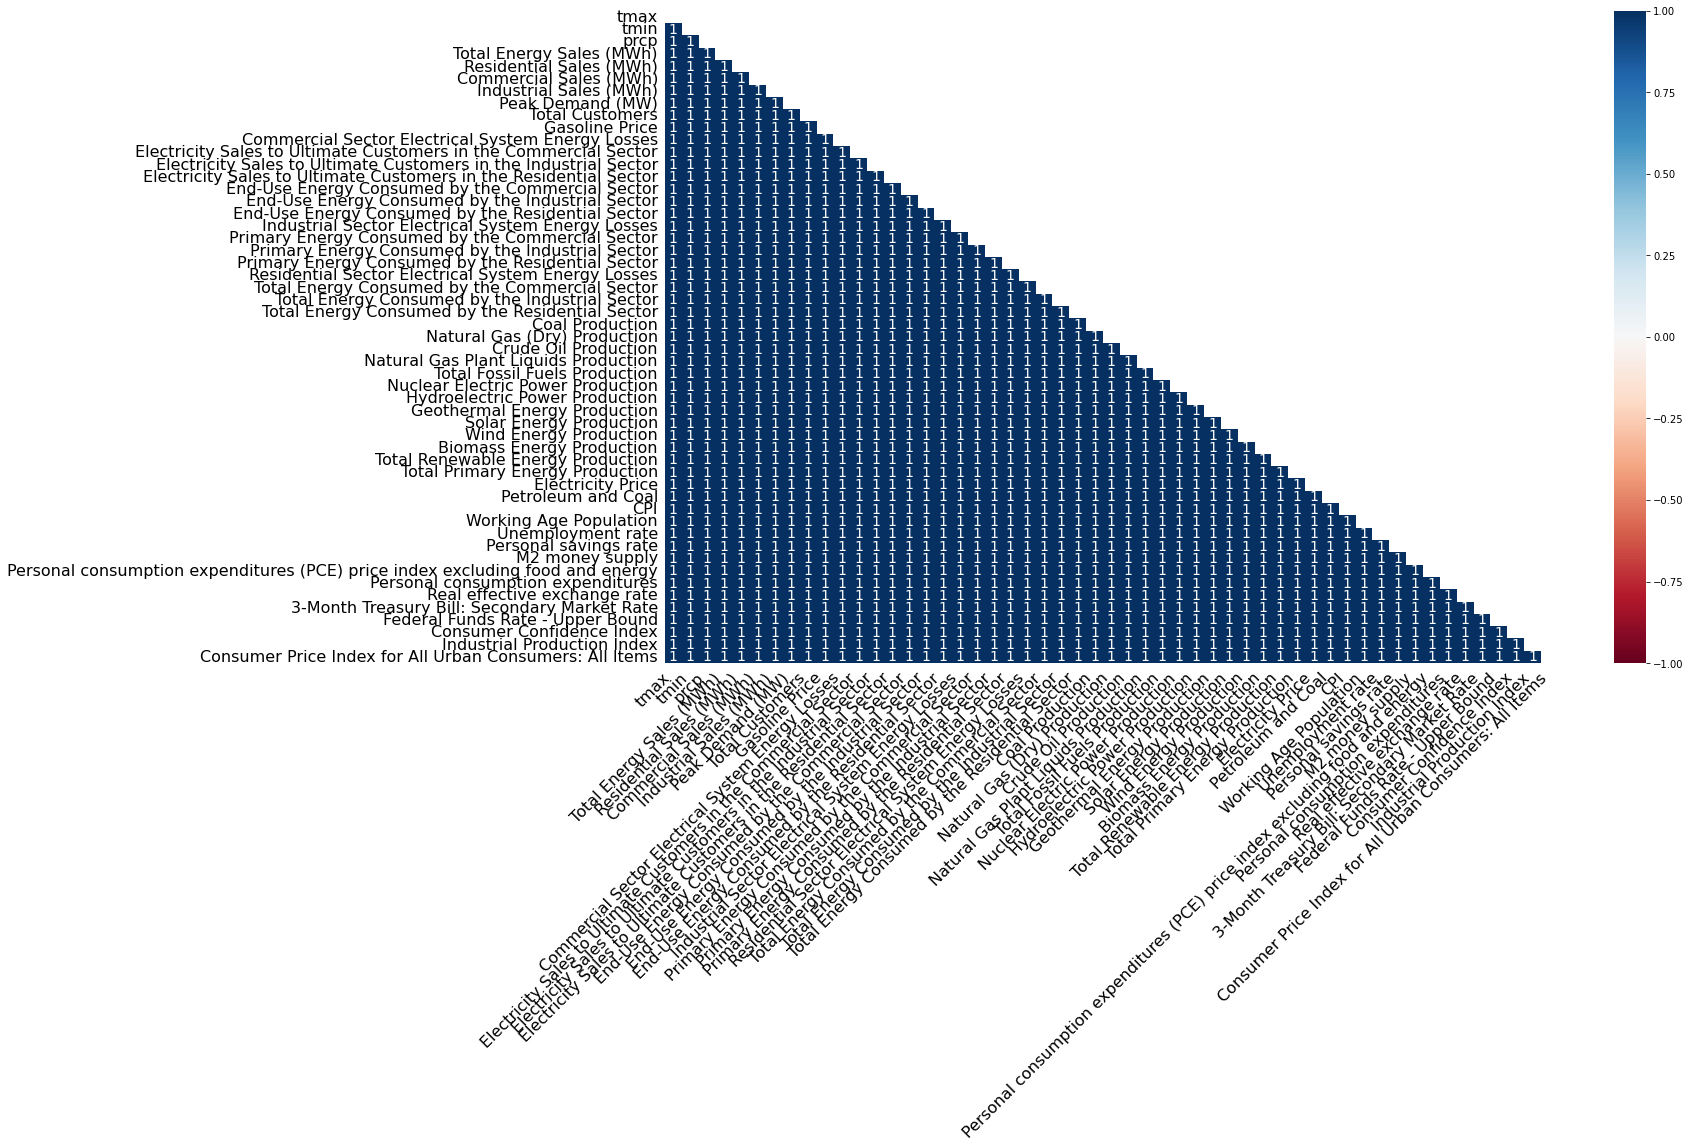

In [10]:
msno.heatmap(df)

<AxesSubplot:>

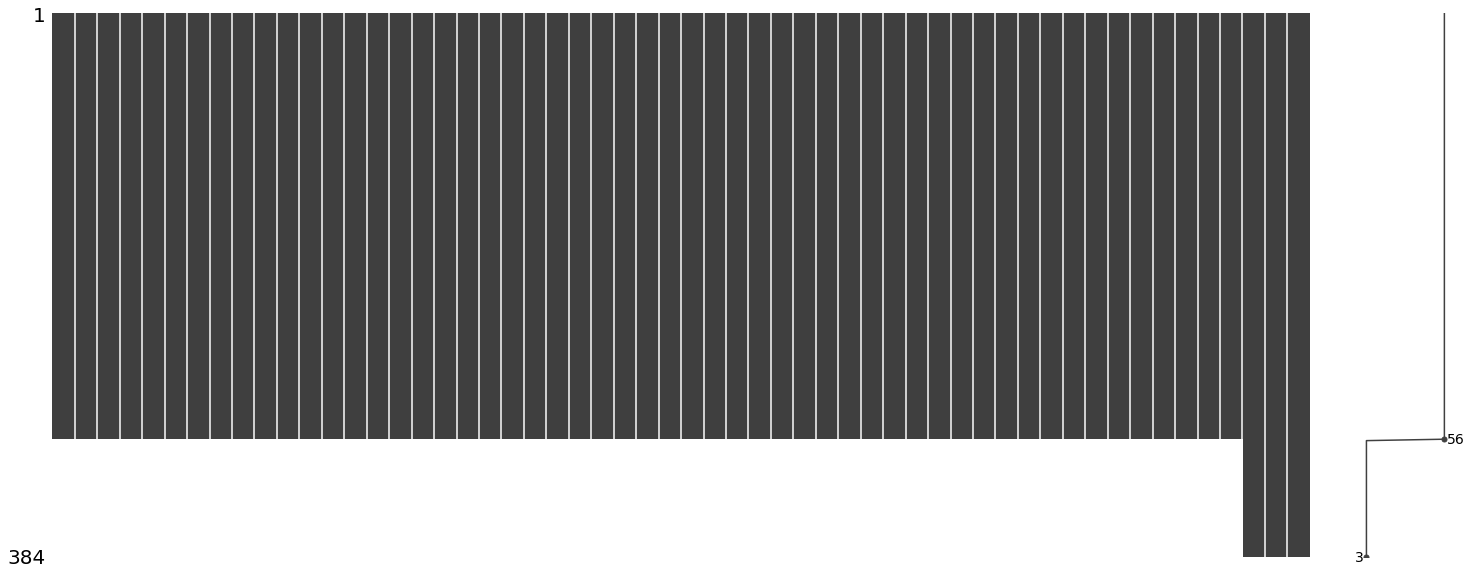

In [11]:
msno.matrix(df)

The above charts and analysis suggest that missing value for all columns occur together. 



## Visualizing periods with missing values

<AxesSubplot:xlabel='DATE'>

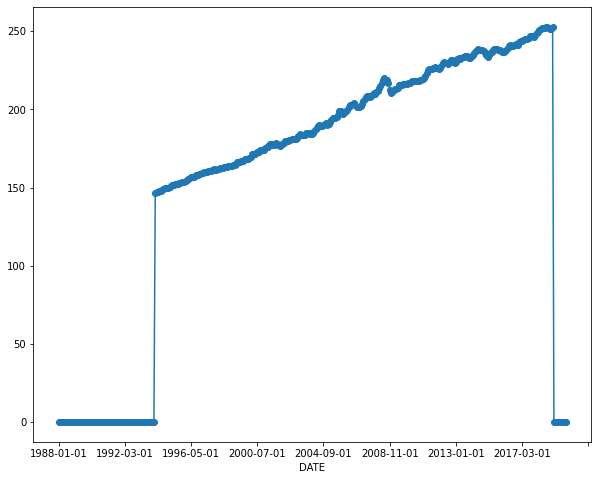

In [12]:
# set figure size
plt.figure(figsize=(10, 8))
# plot the chart with gaps for missing values
df.sort_values('DATE').set_index(['DATE']).fillna(value=0).CPI.plot(linestyle='-', marker='o')

In [13]:
# Dropping NA 
df.dropna(inplace=True)

## Check for duplicates

In [14]:
len(df.drop_duplicates())/ len(df)

1.0

# Visualize the data

<AxesSubplot:>

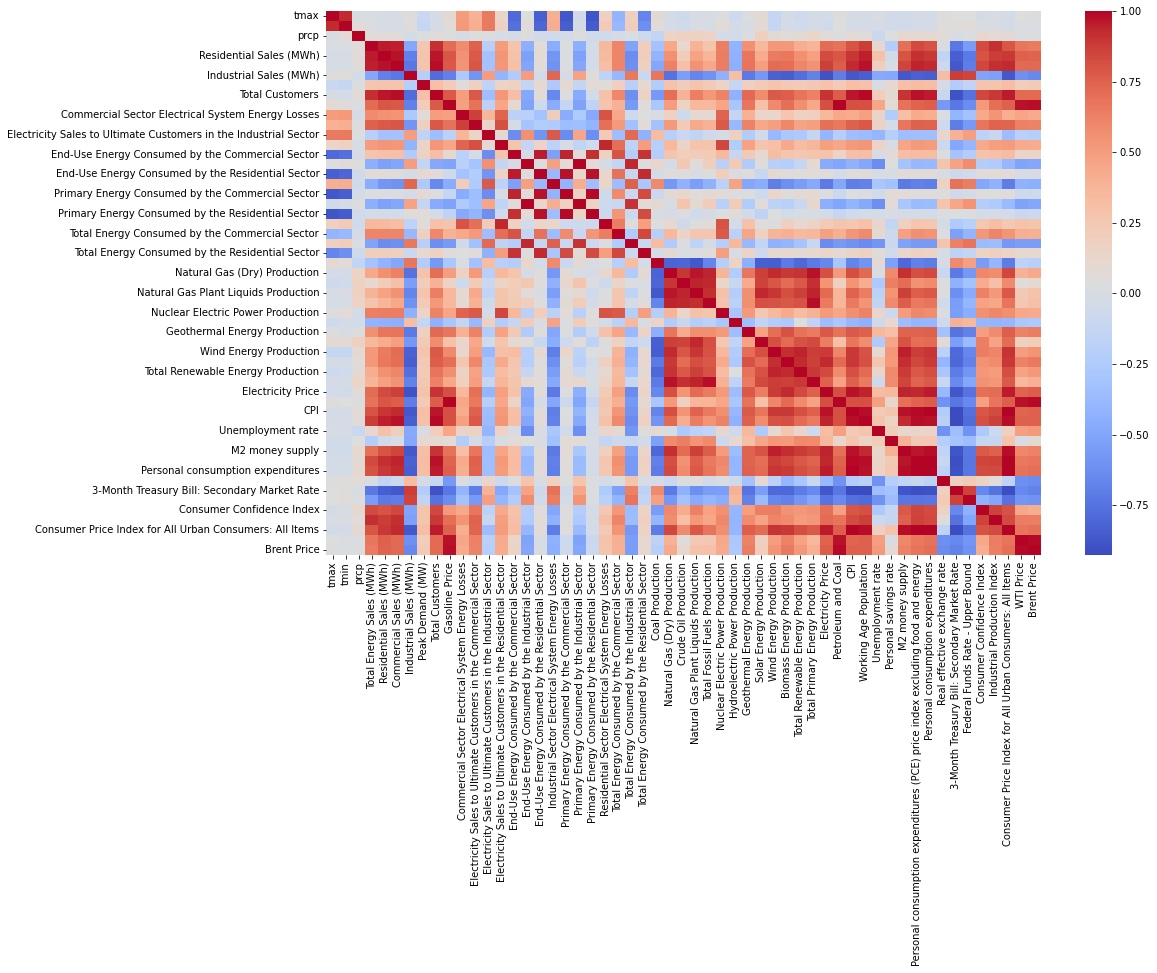

In [15]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, cmap='coolwarm')

The sheer number of columns in the dataframe make it hard to visualize and discern correlations between columns. Further analysis will help clear things up.

In [16]:
def autocorrelation_plot(df, col):
  plt.figure(figsize=(16, 10))
  sm.graphics.tsa.plot_acf(df[col], lags=50)

def partial_autocorrelation_plot(df, col):
  plt.figure(figsize=(16, 10))
  sm.graphics.tsa.plot_pacf(df[col], lags=50)

def plot_rolling_mean_std(df, col):
  plt.figure(figsize=(16, 10))
  rolling_mean = df[col].rolling(window=12).mean()
  rolling_std = df[col].rolling(window=12).std()
  plt.plot(df[col], color='blue', label='Original')
  plt.plot(rolling_mean, color='red', label='Rolling Mean')
  plt.plot(rolling_std, color='black', label='Rolling Std')
  plt.legend(loc='best')

## Looking at Autocorrelation, Partial Autocorrelation plots and, rolling mean and std of some of the variables

### Starting with Total Energy Consumed by the Commercial Sector

<Figure size 1152x720 with 0 Axes>

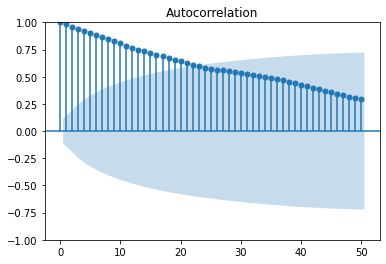

In [17]:
autocorrelation_plot(df.sort_values('DATE'), 'Total Energy Sales (MWh)')

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1152x720 with 0 Axes>

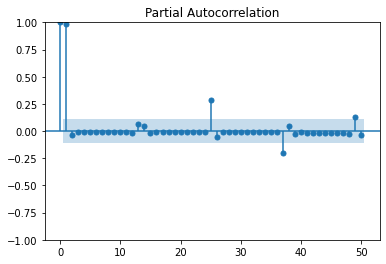

In [18]:
partial_autocorrelation_plot(df.sort_values('DATE'), 'Total Energy Sales (MWh)')

From this graph, we can see that there is an annual seasonal trend since spikes at multiples of 12 stand out.

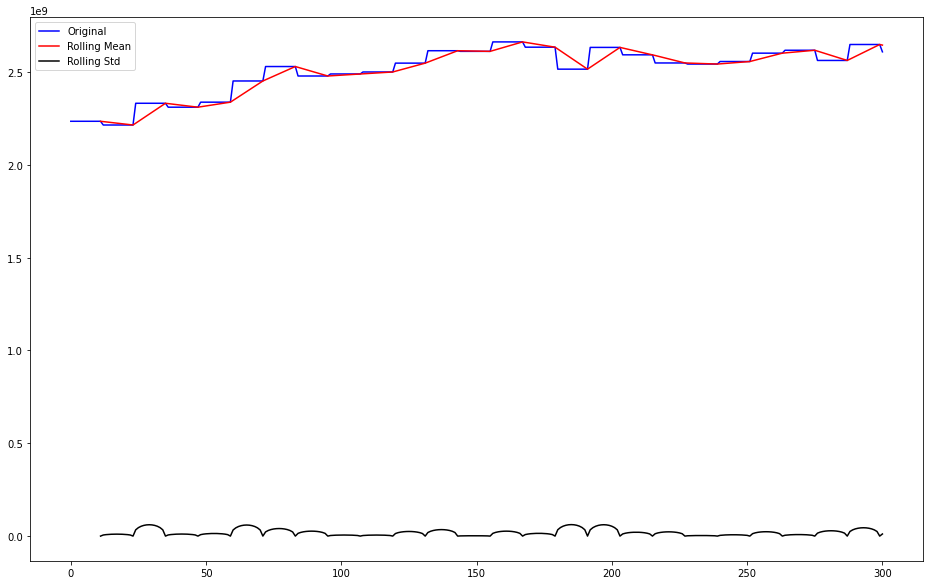

In [19]:
plot_rolling_mean_std(df.sort_values('DATE'), 'Total Energy Sales (MWh)')

ACF, PACF and the increasing mean in the graph above all hint to a non-stationary time series.

### Taking a look at Total Renewable Energy Production

<Figure size 1152x720 with 0 Axes>

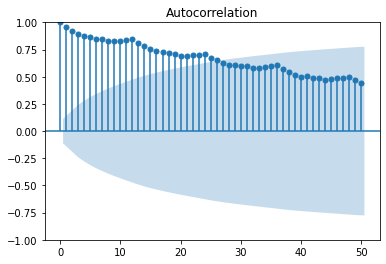

In [20]:
autocorrelation_plot(df.sort_values('DATE'), 'Total Renewable Energy Production')

<Figure size 1152x720 with 0 Axes>

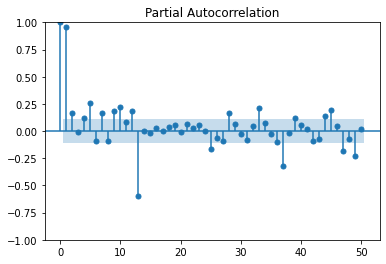

In [21]:
partial_autocorrelation_plot(df.sort_values('DATE'), 'Total Renewable Energy Production')

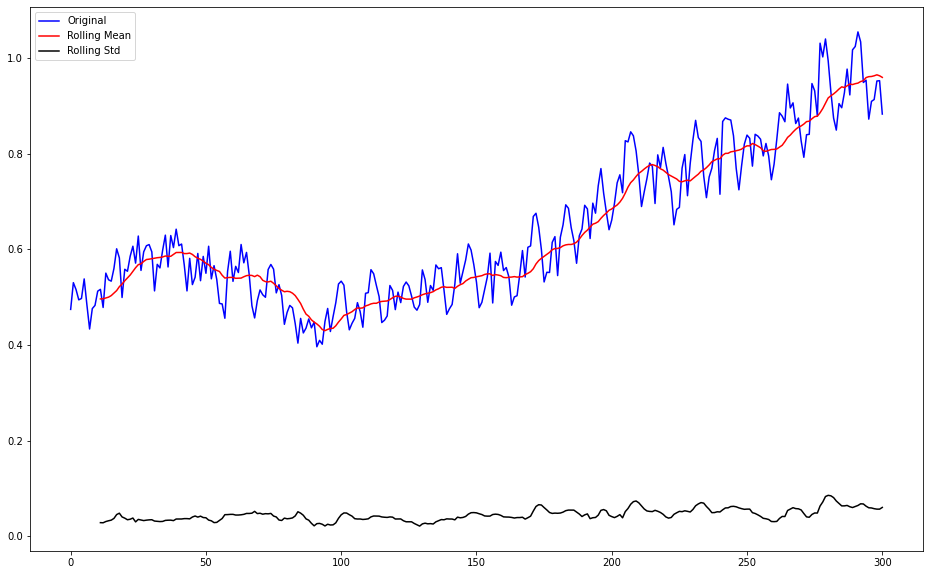

In [22]:
plot_rolling_mean_std(df.sort_values('DATE'), 'Total Renewable Energy Production')

Again, we see non-stationarity but a strong seasonal component as expected. This might be because of increasing technological capabilities over time that do not adhere to any kind of seasonality

## Distribution plot for weather variables

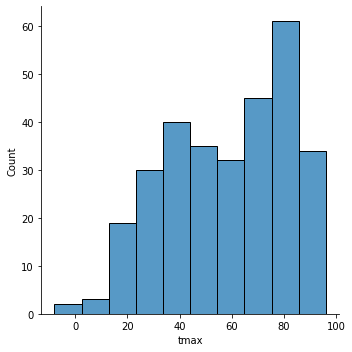

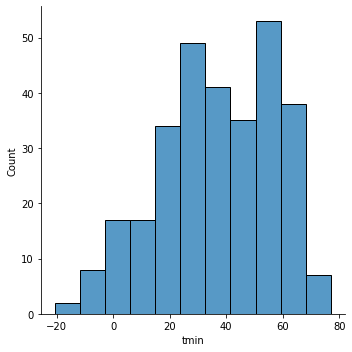

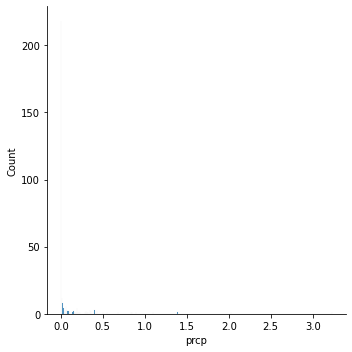

In [23]:
sns.displot(data=df, x='tmax')
sns.displot(data=df, x='tmin')
sns.displot(data=df, x='prcp')

## Time Series plot for energy sales and demand

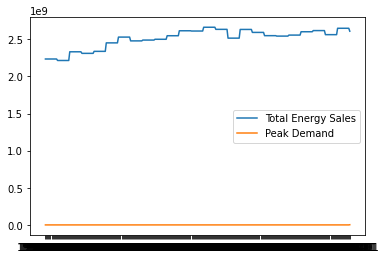

In [24]:
plt.plot(df['DATE'], df['Total Energy Sales (MWh)'], label='Total Energy Sales')
plt.plot(df['DATE'], df['Peak Demand (MW)'], label='Peak Demand')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Peak Demand (MW)', ylabel='Density'>

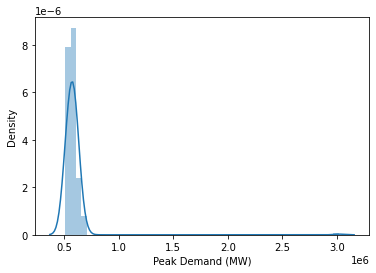

In [25]:
sns.distplot(df['Peak Demand (MW)'])

## Bar plot for energy sales by sector

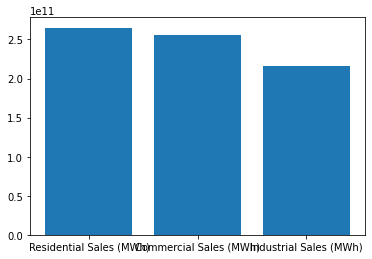

In [26]:
sectors = ['Residential Sales (MWh)', 'Commercial Sales (MWh)', 'Industrial Sales (MWh)']
sales = [df[s].sum() for s in sectors]

plt.bar(sectors, sales)
plt.show()

## Energy Production by Source

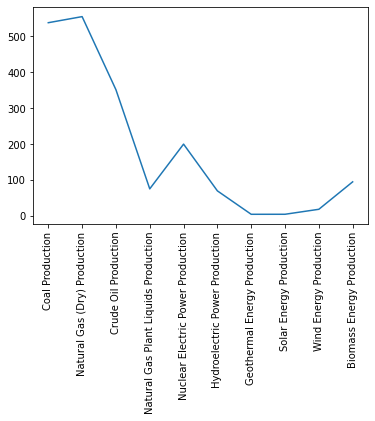

In [27]:
production_cols = ['Coal Production', 'Natural Gas (Dry) Production', 'Crude Oil Production',                   'Natural Gas Plant Liquids Production', 'Nuclear Electric Power Production',                   'Hydroelectric Power Production', 'Geothermal Energy Production',                   'Solar Energy Production', 'Wind Energy Production', 'Biomass Energy Production']

production_data = df[production_cols].sum()

plt.plot(production_data.index, production_data)
plt.xticks(rotation=90)
plt.show()

## Pairplot for macro indicators and Energy Sales

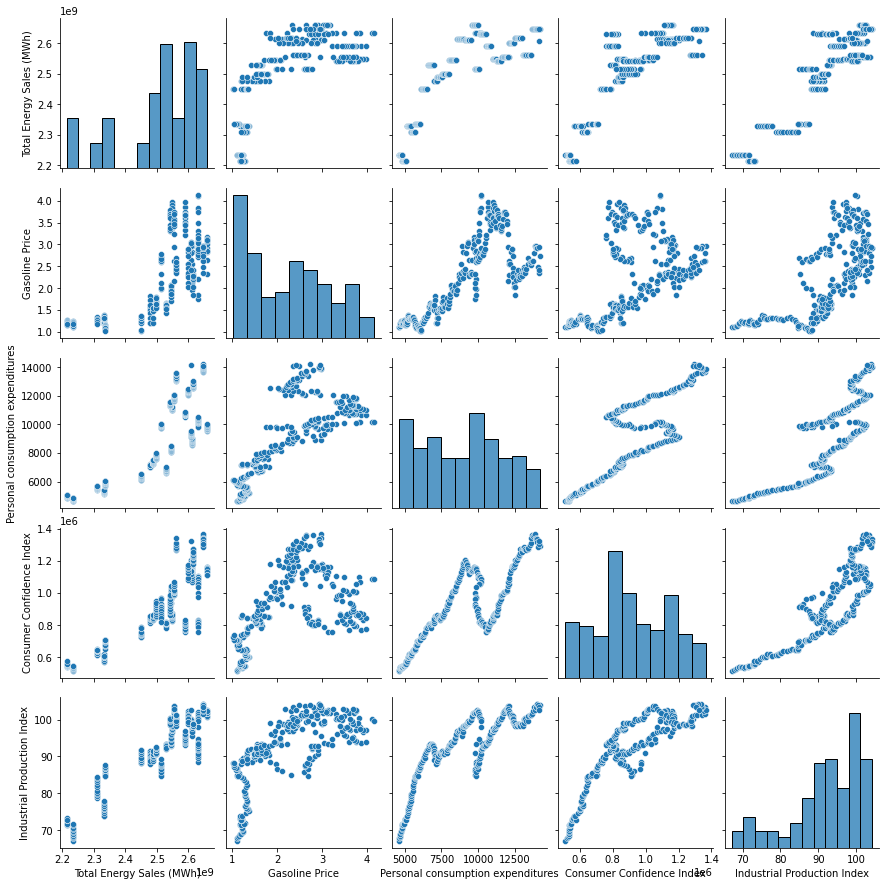

In [28]:
selected_vars = ['Total Energy Sales (MWh)', 'Gasoline Price', 'Personal consumption expenditures',
                 'Consumer Confidence Index', 'Industrial Production Index']

sns.pairplot(data=df, vars=selected_vars)
plt.show()

## Looking at relationships between variables and Total Energy Consumed by the Commercial Sector

In [29]:
def calculate_best_fit_curve(df, x, y):
  # Calculate best fit curve
    degrees = range(1, 5)  # degrees to test
    best_r_squared = -1
    best_degree = 0
    
    for degree in degrees:
        coefficients = np.polyfit(df[x], df[y], degree)
        polynomial = np.poly1d(coefficients)
        y_pred = polynomial(df[x])

        ss_res = np.sum((df[y] - y_pred) ** 2)  # residual sum of squares
        ss_tot = np.sum((df[y] - np.mean(df[y])) ** 2)  # total sum of squares
        r_squared = 1 - (ss_res / ss_tot)  # variance explained
        
        # Check if this is the best fit so far
        if r_squared > best_r_squared:
            best_r_squared = r_squared
            best_degree = degree
    
    return best_degree

In [30]:
def scatter_and_curve_fit(df, x, y):
    """Create a scatter plot of two variables and fit a polynomial curve of the specified degree."""
    
    # Create a scatter plot of the data
    sns.scatterplot(df[x], df[y])
    
    # Fit a polynomial curve through the data
    coeffs = np.polyfit(df[x], df[y], calculate_best_fit_curve(df, x, y))
    polynomial = np.poly1d(coeffs)
    
    # Generate data to plot the curve
    curve_x = np.linspace(min(df[x]), max(df[x]), 100)
    curve_y = polynomial(curve_x)
    
    # Plot the curve
    plt.plot(curve_x, curve_y, color='red')
    
    # Show the plot
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


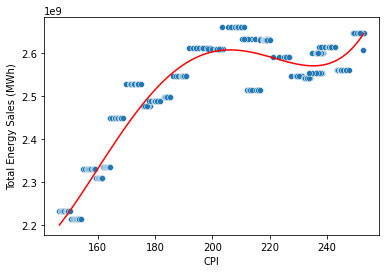

In [31]:
scatter_and_curve_fit(df, 'CPI', 'Total Energy Sales (MWh)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


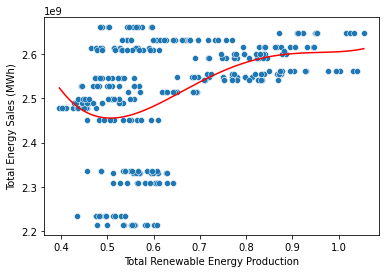

In [32]:
scatter_and_curve_fit(df, 'Total Renewable Energy Production', 'Total Energy Sales (MWh)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


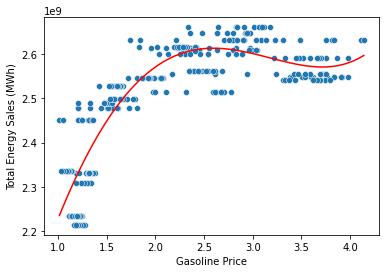

In [33]:
scatter_and_curve_fit(df, 'Gasoline Price', 'Total Energy Sales (MWh)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


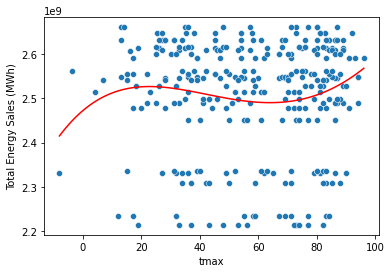

In [34]:
scatter_and_curve_fit(df, 'tmax', 'Total Energy Sales (MWh)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


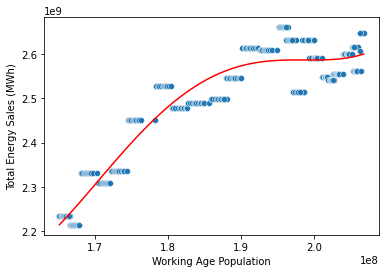

In [35]:
scatter_and_curve_fit(df, 'Working Age Population', 'Total Energy Sales (MWh)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


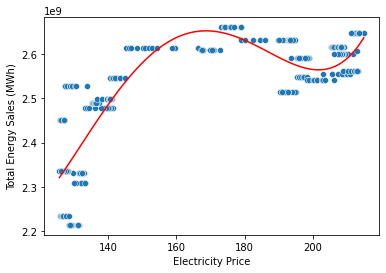

In [36]:
scatter_and_curve_fit(df, 'Electricity Price', 'Total Energy Sales (MWh)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


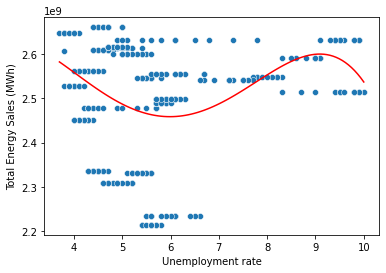

In [37]:
scatter_and_curve_fit(df, 'Unemployment rate', 'Total Energy Sales (MWh)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


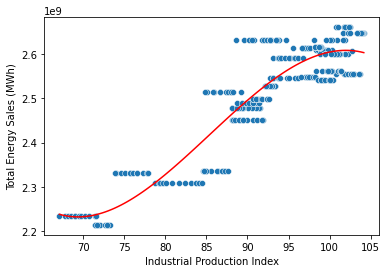

In [38]:
scatter_and_curve_fit(df, 'Industrial Production Index', 'Total Energy Sales (MWh)')

## Looking at relationships between variables and Total Renewable Energy Production

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


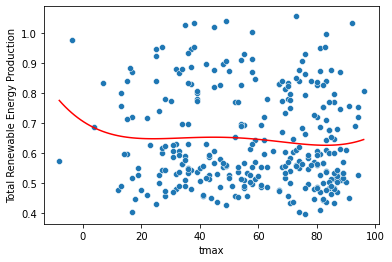

In [39]:
scatter_and_curve_fit(df, 'tmax', 'Total Renewable Energy Production')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


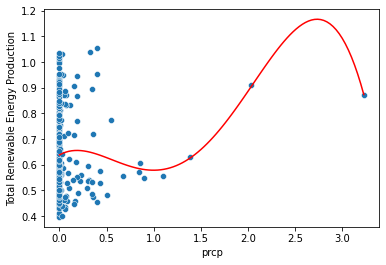

In [40]:
scatter_and_curve_fit(df, 'prcp', 'Total Renewable Energy Production')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


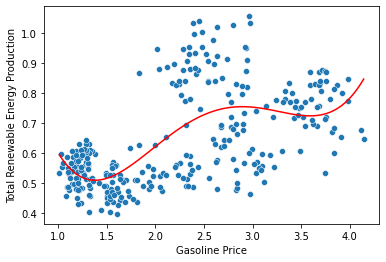

In [41]:
scatter_and_curve_fit(df, 'Gasoline Price', 'Total Renewable Energy Production')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


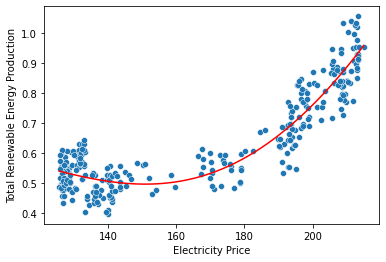

In [42]:
scatter_and_curve_fit(df, 'Electricity Price', 'Total Renewable Energy Production')

## Visualizing Correlation between Energy Consumption attributes

<AxesSubplot:>

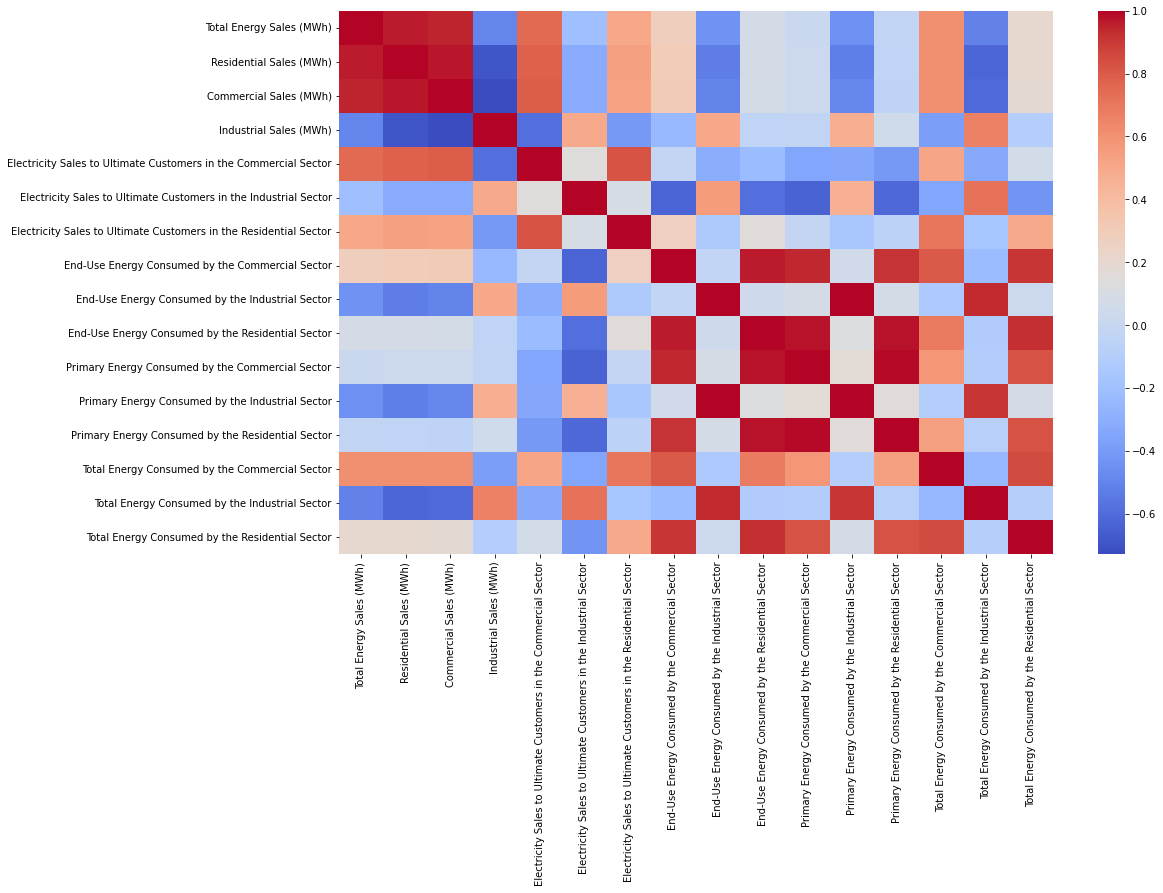

In [43]:
energy_consumption_cols = ['Total Energy Sales (MWh)',
 'Residential Sales (MWh)',
 'Commercial Sales (MWh)',
 'Industrial Sales (MWh)',
 'Electricity Sales to Ultimate Customers in the Commercial Sector',
 'Electricity Sales to Ultimate Customers in the Industrial Sector',
 'Electricity Sales to Ultimate Customers in the Residential Sector',
 'End-Use Energy Consumed by the Commercial Sector',
 'End-Use Energy Consumed by the Industrial Sector',
 'End-Use Energy Consumed by the Residential Sector',
 'Primary Energy Consumed by the Commercial Sector',
 'Primary Energy Consumed by the Industrial Sector',
 'Primary Energy Consumed by the Residential Sector',
 'Total Energy Consumed by the Commercial Sector',
 'Total Energy Consumed by the Industrial Sector',
 'Total Energy Consumed by the Residential Sector']

corr = df[energy_consumption_cols].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, cmap='coolwarm')

## Visualizing Correlation between Energy Production attributes

<AxesSubplot:>

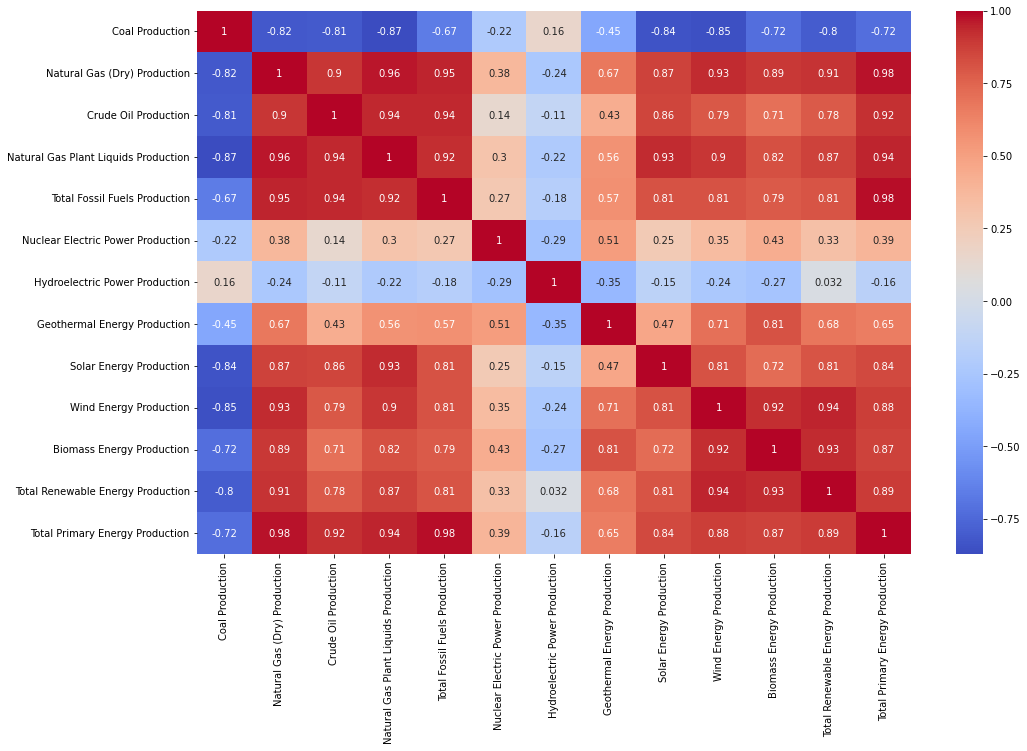

In [44]:
energy_production_cols = [
    'Coal Production',
    'Natural Gas (Dry) Production',
    'Crude Oil Production',
    'Natural Gas Plant Liquids Production',
    'Total Fossil Fuels Production',
    'Nuclear Electric Power Production',
    'Hydroelectric Power Production',
    'Geothermal Energy Production',
    'Solar Energy Production',
    'Wind Energy Production',
    'Biomass Energy Production',
    'Total Renewable Energy Production',
    'Total Primary Energy Production']

corr = df[energy_production_cols].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## For each column, print the highest corresponding correlating column

In [45]:
corr = df.corr()
for col in corr.columns:
    max_corr = corr[col].drop(col).max()
    max_corr_var = corr[col].drop(col).idxmax()
    print(f"{col} has highest correlation with {max_corr_var}: {max_corr:.2f}")

tmax has highest correlation with tmin: 0.93
tmin has highest correlation with tmax: 0.93
prcp has highest correlation with Solar Energy Production: 0.19
Total Energy Sales (MWh) has highest correlation with Residential Sales (MWh): 0.96
Residential Sales (MWh) has highest correlation with Commercial Sales (MWh): 0.97
Commercial Sales (MWh) has highest correlation with Total Customers: 0.98
Industrial Sales (MWh) has highest correlation with 3-Month Treasury Bill: Secondary Market Rate: 0.88
Peak Demand (MW) has highest correlation with Personal consumption expenditures (PCE) price index excluding food and energy: 0.33
Total Customers has highest correlation with Working Age Population: 0.99
Gasoline Price has highest correlation with Petroleum and Coal: 0.99
Commercial Sector Electrical System Energy Losses has highest correlation with Electricity Sales to Ultimate Customers in the Commercial Sector: 0.87
Electricity Sales to Ultimate Customers in the Commercial Sector has highest cor

In [46]:
list(df.columns)

['tmax',
 'tmin',
 'prcp',
 'Total Energy Sales (MWh)',
 'Residential Sales (MWh)',
 'Commercial Sales (MWh)',
 'Industrial Sales (MWh)',
 'Peak Demand (MW)',
 'Total Customers',
 'Gasoline Price',
 'Commercial Sector Electrical System Energy Losses',
 'Electricity Sales to Ultimate Customers in the Commercial Sector',
 'Electricity Sales to Ultimate Customers in the Industrial Sector',
 'Electricity Sales to Ultimate Customers in the Residential Sector',
 'End-Use Energy Consumed by the Commercial Sector',
 'End-Use Energy Consumed by the Industrial Sector',
 'End-Use Energy Consumed by the Residential Sector',
 'Industrial Sector Electrical System Energy Losses',
 'Primary Energy Consumed by the Commercial Sector',
 'Primary Energy Consumed by the Industrial Sector',
 'Primary Energy Consumed by the Residential Sector',
 'Residential Sector Electrical System Energy Losses',
 'Total Energy Consumed by the Commercial Sector',
 'Total Energy Consumed by the Industrial Sector',
 'Total E

In [47]:
cols = ['Total Energy Sales (MWh)',
 'Residential Sales (MWh)',
 'Commercial Sales (MWh)',
 'Industrial Sales (MWh)',
 'Peak Demand (MW)',
 'Total Customers',
 'Gasoline Price',
 'Commercial Sector Electrical System Energy Losses',
 'Electricity Sales to Ultimate Customers in the Commercial Sector',
 'Electricity Sales to Ultimate Customers in the Industrial Sector',
 'Electricity Sales to Ultimate Customers in the Residential Sector',
 'End-Use Energy Consumed by the Commercial Sector',
 'End-Use Energy Consumed by the Industrial Sector',
 'End-Use Energy Consumed by the Residential Sector',
 'Industrial Sector Electrical System Energy Losses',
 'Primary Energy Consumed by the Commercial Sector',
 'Primary Energy Consumed by the Industrial Sector',
 'Primary Energy Consumed by the Residential Sector',
 'Residential Sector Electrical System Energy Losses',
 'Total Energy Consumed by the Commercial Sector',
 'Total Energy Consumed by the Industrial Sector',
 'Total Energy Consumed by the Residential Sector',
 'Coal Production',
 'Natural Gas (Dry) Production',
 'Crude Oil Production',
 'Natural Gas Plant Liquids Production',
 'Total Fossil Fuels Production',
 'Nuclear Electric Power Production',
 'Hydroelectric Power Production',
 'Geothermal Energy Production',
 'Solar Energy Production',
 'Wind Energy Production',
 'Biomass Energy Production',
 'Total Renewable Energy Production',
 'Total Primary Energy Production',
 'Electricity Price',
 'Petroleum and Coal']

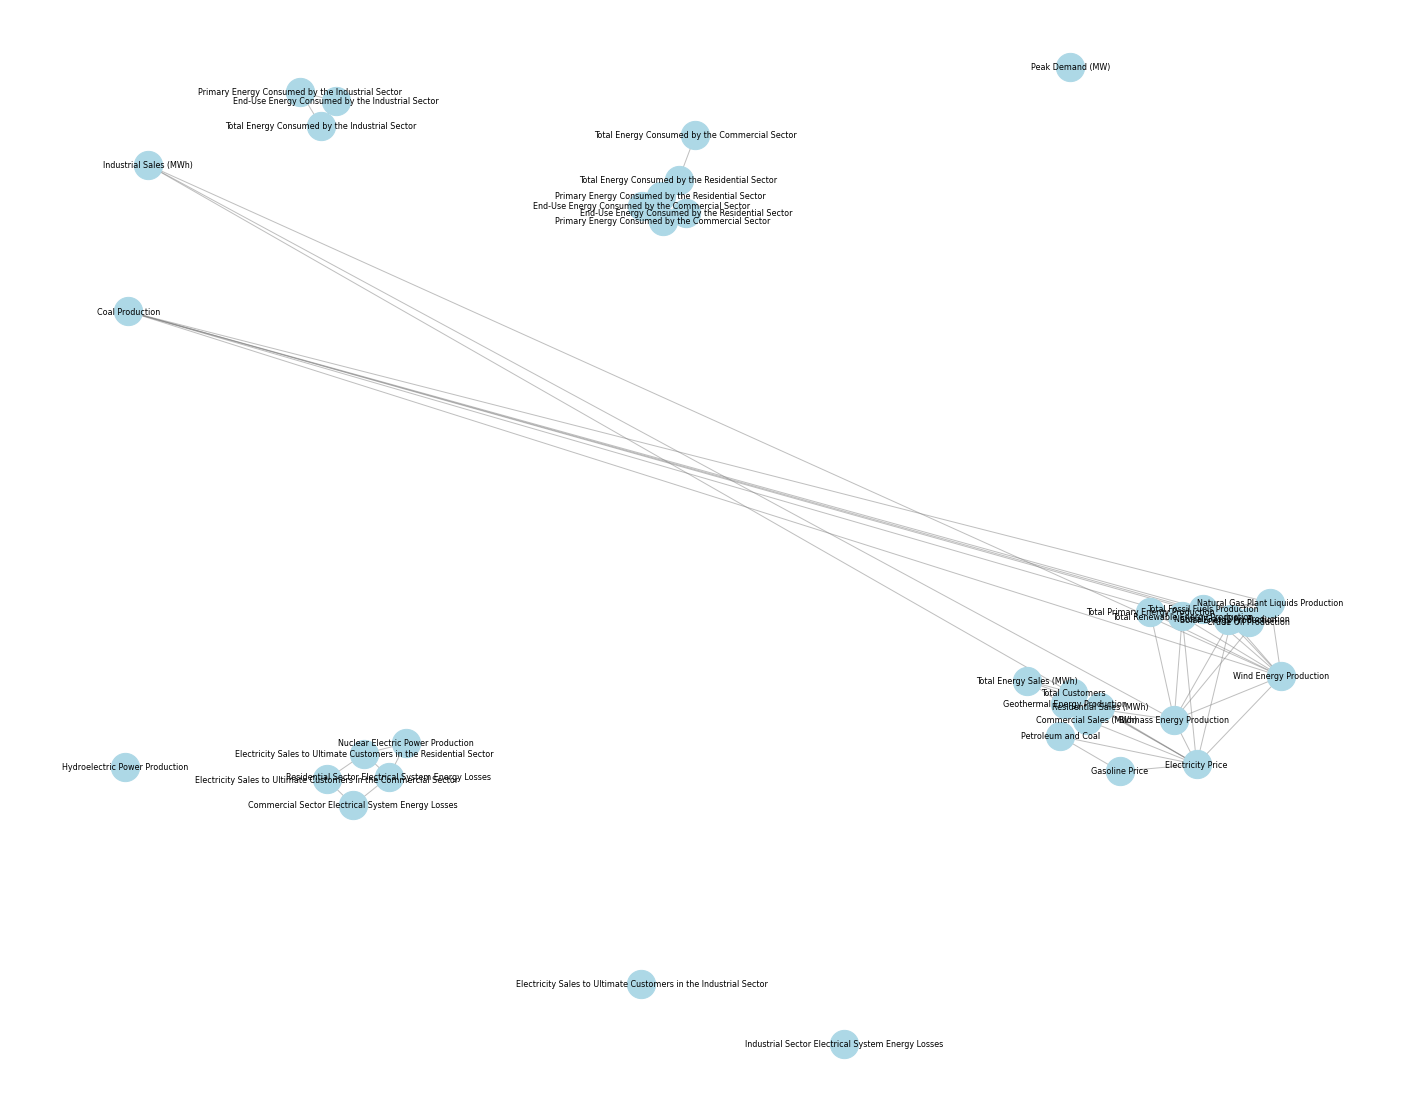

In [48]:
plt.figure(figsize=(25,20))


# create empty graph
G = nx.Graph()

temp_df = df.drop('DATE', axis=1)[cols]

# Create a list of columns to use as nodes in the network graph
nodes = list(temp_df.columns)

# Add the nodes to the graph
G.add_nodes_from(nodes)

# Loop through each pair of nodes and calculate the correlation
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):
        corr = temp_df[nodes[i]].corr(temp_df[nodes[j]])
        
        # Add an edge to the graph if the correlation is above a certain threshold
        if abs(corr) > 0.8:
            G.add_edge(nodes[i], nodes[j], weight=corr)

# Define the layout of the graph using the spring layout algorithm
pos = nx.spring_layout(G, k=0.15, seed=42)

# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

# Add labels to the nodes
labels = {node: node for node in nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_family='sans-serif')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Display the graph
plt.axis('off')
plt.show()

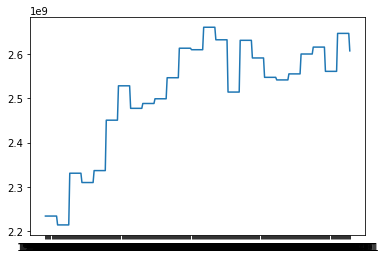

In [49]:
plt.plot(df['DATE'], df['Total Energy Sales (MWh)'])

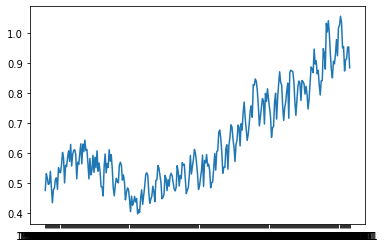

In [50]:
plt.plot(df['DATE'], df['Total Renewable Energy Production'])

In [63]:
metal_prices = pd.read_csv('/content/gdrive/Shareddrives/LMN/LMN_Group_Project/Datasets/Energy Consumption and Renewables Generation/Produce_Prices_Metals.csv')

In [64]:
metal_prices.rename(columns={'PCU2122321223': 'Metal Prices'}, inplace=True)

In [65]:
metal_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          312 non-null    object 
 1   Metal Prices  312 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB


In [66]:
metal_prices.describe()

,Metal Prices
count,312.000000
mean,247.703526
std,138.421518
min,59.500000
25%,97.350000
50%,263.850000
75%,375.750000
max,512.900000


In [67]:
metal_prices.head()

,DATE,Metal Prices
0,1994-01-01,76.6
1,1994-02-01,81.4
2,1994-03-01,84.9
3,1994-04-01,86.4
4,1994-05-01,89.7


In [70]:
df = pd.merge(df, metal_prices, left_on='DATE', right_on='DATE', how='inner')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Metal Prices', ylabel='Total Renewable Energy Production'>

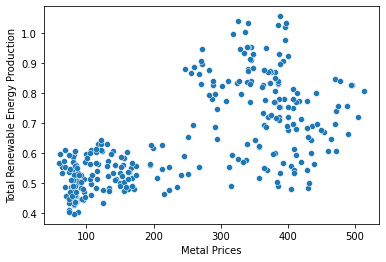

In [71]:
sns.scatterplot(df['Metal Prices'], df['Total Renewable Energy Production'])